In [3]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
import seaborn as sns
from collections import Counter
warnings.filterwarnings("ignore")
%matplotlib inline

In [1]:
!wget -O titanic.csv https://raw.githubusercontent.com/Handit14/OrbitFutureAcademy_KampusMerdeka/main/Materi/titanic.csv

--2021-11-12 14:25:04--  https://raw.githubusercontent.com/Handit14/OrbitFutureAcademy_KampusMerdeka/main/Materi/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55170 (54K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  53.88K  --.-KB/s    in 0.01s   

2021-11-12 14:25:04 (5.03 MB/s) - ‘titanic.csv’ saved [55170/55170]



In [5]:
#load dataset
titanic = pd.read_csv('titanic.csv', header = 0, dtype={'Age': np.float64})
titanic.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,NaN,Q,0


In [6]:
#Melihat pembagian data pada kolom label yaitu 'Survived'
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Survived     891 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [8]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Cabin,687,77.104377
Embarked,2,0.224467


# Performing Data Cleaning and Analysis

1. Understanding meaning of each column:
Data Dictionary: 
Deskripsi tiap variabel
 
Survived - Survived (1) atau died (0)
Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name - Passenger’s name
Sex - Passenger’s sex
Age - Passenger’s age
SibSp - Number of siblings/spouses aboard
Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
Ticket - Ticket number
Cabin - Cabin
Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


2. Menganalisis kolom mana yang kira kira akan useful untuk menentukan apakah seseorang akan survived atau tidak

In [9]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,1.000000


In [10]:
#Kolom nama tidak akan pernah bisa menentukan apakah seseorang akan survived atau tidak, jadi kita bisa mendeletenya

del titanic["Name"]
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,NaN,S,0
1,2,1,female,38.0,1,0,PC 17599,C85,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,1
3,4,1,female,35.0,1,0,113803,C123,S,1
4,5,3,male,35.0,0,0,373450,NaN,S,0


In [11]:
#Begitu juga jenis tiket, Kolom tiket tidak akan pernah bisa menentukan apakah seseorang akan survived atau tidak, jadi kita bisa mendeletenya

del titanic["Ticket"]
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,NaN,S,0
1,2,1,female,38.0,1,0,C85,C,1
2,3,3,female,26.0,0,0,NaN,S,1
3,4,1,female,35.0,1,0,C123,S,1
4,5,3,male,35.0,0,0,NaN,S,0


In [12]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Cabin,687,77.104377
Embarked,2,0.224467
Survived,0,0.000000


In [13]:
#Dengan melihat presentasi jumlah missing value tiap kolom, kita dapat melihat kalau jumlah missing value dalam kolom 'Cabin'
#sangat besar sekali, bahkan sampai 77%, dengan begini kita bisa mengatakan kalau kolom 'Cabin' tidak punya pengaruh banyak
#dalam menentukan apakah seseorang akan survived atau tidak

del titanic['Cabin']
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,male,22.0,1,0,S,0
1,2,1,female,38.0,1,0,C,1
2,3,3,female,26.0,0,0,S,1
3,4,1,female,35.0,1,0,S,1
4,5,3,male,35.0,0,0,S,0


In [14]:
# Seperti yang kita tahu kalau banyak algoritma machine learning tidak dapat bekerja dengan categorical data, maka dari itu
# kita akan merubah value pada kolom 'Sex' dari bentuk categorical menjadi numerical dengan ketentuan male=1 and female=2


def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["Sex"]=titanic["Sex"].apply(getNumber)

titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,1,22.0,1,0,S,0
1,2,1,2,38.0,1,0,C,1
2,3,3,2,26.0,0,0,S,1
3,4,1,2,35.0,1,0,S,1
4,5,3,1,35.0,0,0,S,0


In [15]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Embarked,2,0.224467
Survived,0,0.000000


#### Diatas kita bisa melihat ada 2 kolom yang mempunyai missing value, yaitu kolom 'Age' dan 'Embarked'. Kita akan menghandle untuk kolom 'Age' terlebih dahulu, dimana kita akan mengisi dengan menggunakan nilai Mean dengan melihat kelas survivednya. Dimana jika ada di data kelas 0 maka kita akan mengisinya dengan mean 'Age' kelas 0, dan jika data ada di kelas 1 maka akan diisi menggunakan mean 'Age' kelas 1

In [16]:
# mencari nilai mean kolom 'Age' untuk kelas 1
meanS= titanic[titanic.Survived==1].Age.mean()
meanS

28.343689655172415

In [17]:
# mengisi missing value pada kolom 'Age' untuk yang kelas 1 dengan menggunakan mean 'Age' kelas 1
titanic["Age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS, titanic["Age"])
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,1,22.0,1,0,S,0
1,2,1,2,38.0,1,0,C,1
2,3,3,2,26.0,0,0,S,1
3,4,1,2,35.0,1,0,S,1
4,5,3,1,35.0,0,0,S,0


In [18]:
# mencari nilai mean kolom 'Age' untuk kelas 0

meanNS=titanic[titanic.Survived==0].Age.mean()
meanNS

30.62617924528302

In [19]:
# mengisi missing value pada kolom 'Age' untuk yang kelas 0 dengan menggunakan mean 'Age' kelas 0

titanic.Age.fillna(meanNS,inplace=True)
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,1,22.0,1,0,S,0
1,2,1,2,38.0,1,0,C,1
2,3,3,2,26.0,0,0,S,1
3,4,1,2,35.0,1,0,S,1
4,5,3,1,35.0,0,0,S,0


In [20]:
# Disini kita bisa melihat kalau setelah dilakukan proses diatas, maka tidak ada missing values pada kolom 'Age'

titanic.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
Survived       0
dtype: int64

Lalu untuk yang kolom "Embarked" kita bisa melihat kalau hanya 2 data saja yg mempunyai masalah missing value, dengan begitu kita bisa menghapus data yang mempunya missing value, karena data yg punya masalah missing value tidak banyak, yaitu hanya 2

In [21]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,1,22.0,1,0,S,0
1,2,1,2,38.0,1,0,C,1
2,3,3,2,26.0,0,0,S,1
3,4,1,2,35.0,1,0,S,1
4,5,3,1,35.0,0,0,S,0


In [22]:
# Disini kita bisa melihat kalau setelah dilakukan proses diatas, maka tidak ada missing values pada kolom apapun

titanic.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Survived       0
dtype: int64

### Melakukan pendeteksian outliers

In [23]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Survived'],
      dtype='object')

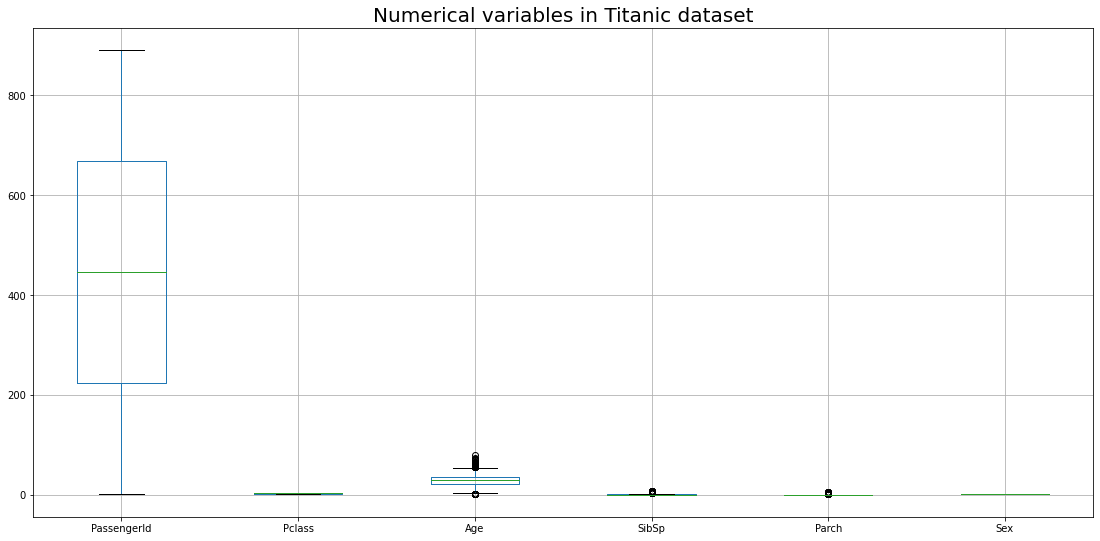

In [24]:
num_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Embarked', 'Sex']
plt.figure(figsize=(19,9))
titanic[num_cols].boxplot()
plt.title("Numerical variables in Titanic dataset", fontsize=20)
plt.show()

Disini kita bisa melihat melalui boxplot, bahwa tidak ada nilai outliers

In [25]:
#Merubah data kategorikal pada kolom "Embarked" ke data numerical

def getEmb(str):
    if str=="S":
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
titanic["Embarked"]=titanic["Embarked"].apply(getEmb)
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,1,22.0,1,0,1,0
1,2,1,2,38.0,1,0,3,1
2,3,3,2,26.0,0,0,1,1
3,4,1,2,35.0,1,0,1,1
4,5,3,1,35.0,0,0,1,0


### Memvisualisasikan Data untuk melihat perbandingan Antara Pria dan Wanita yg selamat maupun tidak selamat

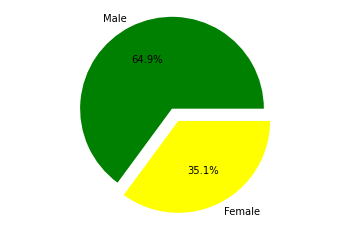

In [26]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

males = (titanic['Sex'] == 1).sum() 
#Summing up all the values of column gender with a 
#condition for male and similary for females
females = (titanic['Sex'] == 2).sum()
# print(males)
# print(females)
p = [males, females]
plt.pie(p,    #giving array
        autopct='%1.1f%%',
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

In [27]:
# More Precise Pie Chart
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


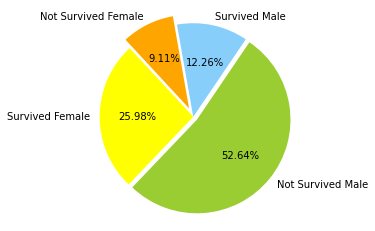

In [28]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()

In [29]:
X = titanic.iloc[:,:7].values

In [30]:
Y = titanic.iloc[:, 7].values

In [31]:
X

array([[  1.,   3.,   1., ...,   1.,   0.,   1.],
       [  2.,   1.,   2., ...,   1.,   0.,   3.],
       [  3.,   3.,   2., ...,   0.,   0.,   1.],
       ...,
       [889.,   3.,   2., ...,   1.,   2.,   1.],
       [890.,   1.,   1., ...,   0.,   0.,   3.],
       [891.,   3.,   1., ...,   0.,   0.,   2.]])

In [32]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

# Handling missing value, sebenarnya di data ini tidak terdapat masalah Imbalanced Dataset. Akan tetapi untuk keperluan materi akan didemokan bagaimana cara menggunakan SMOTE ke dataset

In [33]:
counter = Counter(Y)
print(counter)

Counter({0: 549, 1: 340})


In [34]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [35]:
counter = Counter(Y_smote)
print(counter)

Counter({0: 549, 1: 549})


# Melakukan data transformasi menggunakan MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.         1.         0.         ... 0.125      0.         0.        ]
 [0.0011236  0.         1.         ... 0.125      0.         1.        ]
 [0.00224719 1.         1.         ... 0.         0.         0.        ]
 ...
 [0.99775281 1.         1.         ... 0.125      0.33333333 0.        ]
 [0.9988764  0.         0.         ... 0.         0.         1.        ]
 [1.         1.         0.         ... 0.         0.         0.5       ]]


In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [39]:
from sklearn import metrics

y_predict = knn.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))

Test set Accuracy:  0.7865168539325843


In [40]:
Ks = 10
mean_acc = np.zeros((Ks))


for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    y_predict=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_predict)

mean_acc

array([0.74719101, 0.79775281, 0.78651685, 0.80337079, 0.78651685,
       0.75842697, 0.76966292, 0.78089888, 0.78089888, 0.78089888])

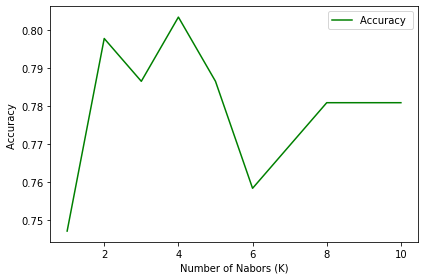

In [41]:
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [42]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8033707865168539 with k= 4
